In [1]:
import requests

In [2]:
topics_url=("https://github.com/topics")

In [3]:
response=requests.get(topics_url)

In [4]:
response.status_code   # it checks whether the resquest is working

200

In [5]:
len(response.text)

206122

In [6]:
pagecontents=response.text

In [7]:
pagecontents[:1000]

'\n\n<!DOCTYPE html>\n<html\n  lang="en"\n  \n  data-color-mode="auto" data-light-theme="light" data-dark-theme="dark"\n  data-a11y-animated-images="system" data-a11y-link-underlines="true"\n  \n  >\n\n\n\n  <head>\n    <meta charset="utf-8">\n  <link rel="dns-prefetch" href="https://github.githubassets.com">\n  <link rel="dns-prefetch" href="https://avatars.githubusercontent.com">\n  <link rel="dns-prefetch" href="https://github-cloud.s3.amazonaws.com">\n  <link rel="dns-prefetch" href="https://user-images.githubusercontent.com/">\n  <link rel="preconnect" href="https://github.githubassets.com" crossorigin>\n  <link rel="preconnect" href="https://avatars.githubusercontent.com">\n\n  \n\n  <link crossorigin="anonymous" media="all" rel="stylesheet" href="https://github.githubassets.com/assets/light-3e154969b9f9.css" /><link crossorigin="anonymous" media="all" rel="stylesheet" href="https://github.githubassets.com/assets/dark-9c5b7a476542.css" /><link data-color-theme="dark_dimmed" cross

In [8]:
#with open('webpage.html','w') as f:
    #f.write(pagecontents.encode("utf-8"))

In [9]:
## use beautifulsoup to parse and extract information

In [10]:
from bs4 import BeautifulSoup

In [11]:
soup=BeautifulSoup(pagecontents,'html.parser')

In [12]:
p_tags=soup.find_all('p')
p_tags

[<p>We read every piece of feedback, and take your input very seriously.</p>,
 <p class="text-small color-fg-muted">
             To see all available qualifiers, see our <a class="Link--inTextBlock" href="https://docs.github.com/search-github/github-code-search/understanding-github-code-search-syntax">documentation</a>.
           </p>,
 <p class="f4 color-fg-muted col-md-6 mx-auto">Browse popular topics on GitHub.</p>,
 <p class="f3 lh-condensed text-center Link--primary mb-0 mt-1">
         R
       </p>,
 <p class="f5 color-fg-muted text-center mb-0 mt-1">R is a free programming language and software environment for statistical computing and graphics.</p>,
 <p class="f3 lh-condensed text-center Link--primary mb-0 mt-1">
         The Julia Language
       </p>,
 <p class="f5 color-fg-muted text-center mb-0 mt-1">Julia is a high-level, high-performance dynamic programming language for numerical computing.</p>,
 <p class="f3 lh-condensed text-center Link--primary mb-0 mt-1">
         

In [13]:
#len(topic_title_tags)

In [14]:
#topic_title_tags#

In [15]:
topic_title_tags=soup.find_all('p',{"class":"f3 lh-condensed mb-0 mt-1 Link--primary"})

In [16]:
topic_title_tags[:5]

[<p class="f3 lh-condensed mb-0 mt-1 Link--primary">3D</p>,
 <p class="f3 lh-condensed mb-0 mt-1 Link--primary">Ajax</p>,
 <p class="f3 lh-condensed mb-0 mt-1 Link--primary">Algorithm</p>,
 <p class="f3 lh-condensed mb-0 mt-1 Link--primary">Amp</p>,
 <p class="f3 lh-condensed mb-0 mt-1 Link--primary">Android</p>]

In [17]:
len(topic_title_tags)

30

In [18]:
discription_class={"class":"f5 color-fg-muted mb-0 mt-1"}
topic_discription_class=soup.find_all('p',discription_class)

In [19]:
topic_discription_class[:5]

[<p class="f5 color-fg-muted mb-0 mt-1">
           3D refers to the use of three-dimensional graphics, modeling, and animation in various industries.
         </p>,
 <p class="f5 color-fg-muted mb-0 mt-1">
           Ajax is a technique for creating interactive web applications.
         </p>,
 <p class="f5 color-fg-muted mb-0 mt-1">
           Algorithms are self-contained sequences that carry out a variety of tasks.
         </p>,
 <p class="f5 color-fg-muted mb-0 mt-1">
           Amp is a non-blocking concurrency library for PHP.
         </p>,
 <p class="f5 color-fg-muted mb-0 mt-1">
           Android is an operating system built by Google designed for mobile devices.
         </p>]

In [20]:
topic0_url=topic_title_tags[0].parent


In [21]:
link0="https://github.com"+topic0_url.get('href')

In [22]:
link0

'https://github.com/topics/3d'

In [23]:
#topic1_url=topic_title_tags[1].parent
#topic1_url

In [24]:
#link1="https://github.com"+topic1_url.get('href')

In [25]:
#link1

In [26]:
#topic2_url=topic_title_tags[2].parent
#topic2_url

In [27]:
#link2="https://github.com"+topic2_url.get('href')

In [28]:
#link2

In [29]:
topic_link_tags = soup.find_all('a',{'class': "no-underline flex-grow-0"})
len(topic_link_tags)

30

In [30]:
topic0_url="https://github.com"+topic_link_tags[0]['href']

In [31]:
topic0_url

'https://github.com/topics/3d'

In [32]:
topic_titles=[]
for tags in topic_title_tags:
    topic_titles.append(tags.text)
print(topic_titles)

['3D', 'Ajax', 'Algorithm', 'Amp', 'Android', 'Angular', 'Ansible', 'API', 'Arduino', 'ASP.NET', 'Awesome Lists', 'Amazon Web Services', 'Azure', 'Babel', 'Bash', 'Bitcoin', 'Bootstrap', 'Bot', 'C', 'Chrome', 'Chrome extension', 'Command-line interface', 'Clojure', 'Code quality', 'Code review', 'Compiler', 'Continuous integration', 'C++', 'Cryptocurrency', 'Crystal']


In [33]:
topic_description=[]
for tag in topic_discription_class:
    topic_description.append(tag.text.strip())
print(topic_description[:5])

['3D refers to the use of three-dimensional graphics, modeling, and animation in various industries.', 'Ajax is a technique for creating interactive web applications.', 'Algorithms are self-contained sequences that carry out a variety of tasks.', 'Amp is a non-blocking concurrency library for PHP.', 'Android is an operating system built by Google designed for mobile devices.']


In [34]:
topic_urls=[]
base_url="https://github.com"
for tag in topic_link_tags:
    topic_urls.append(base_url + tag["href"])
print(topic_urls[:5])

['https://github.com/topics/3d', 'https://github.com/topics/ajax', 'https://github.com/topics/algorithm', 'https://github.com/topics/amphp', 'https://github.com/topics/android']


In [35]:
import pandas as pd

In [36]:
topic_dict={"title":topic_titles,"description":topic_description,"url":topic_urls}

In [37]:
topic_dict

{'title': ['3D',
  'Ajax',
  'Algorithm',
  'Amp',
  'Android',
  'Angular',
  'Ansible',
  'API',
  'Arduino',
  'ASP.NET',
  'Awesome Lists',
  'Amazon Web Services',
  'Azure',
  'Babel',
  'Bash',
  'Bitcoin',
  'Bootstrap',
  'Bot',
  'C',
  'Chrome',
  'Chrome extension',
  'Command-line interface',
  'Clojure',
  'Code quality',
  'Code review',
  'Compiler',
  'Continuous integration',
  'C++',
  'Cryptocurrency',
  'Crystal'],
 'description': ['3D refers to the use of three-dimensional graphics, modeling, and animation in various industries.',
  'Ajax is a technique for creating interactive web applications.',
  'Algorithms are self-contained sequences that carry out a variety of tasks.',
  'Amp is a non-blocking concurrency library for PHP.',
  'Android is an operating system built by Google designed for mobile devices.',
  'Angular is an open source web application platform.',
  'Ansible is a simple and powerful automation engine.',
  'An API (Application Programming Interfa

In [38]:
topic_df = pd.DataFrame(topic_dict)
print(topic_df)

                     title                                        description  \
0                       3D  3D refers to the use of three-dimensional grap...   
1                     Ajax  Ajax is a technique for creating interactive w...   
2                Algorithm  Algorithms are self-contained sequences that c...   
3                      Amp  Amp is a non-blocking concurrency library for ...   
4                  Android  Android is an operating system built by Google...   
5                  Angular  Angular is an open source web application plat...   
6                  Ansible  Ansible is a simple and powerful automation en...   
7                      API  An API (Application Programming Interface) is ...   
8                  Arduino  Arduino is an open source platform for buildin...   
9                  ASP.NET  ASP.NET is a web framework for building modern...   
10           Awesome Lists  An awesome list is a list of awesome things cu...   
11     Amazon Web Services  

In [39]:
# creating csv with the extracted information

In [40]:
topic_df.to_csv("topics.csv")

In [41]:
# getting information outof topic page

In [42]:
topic_page_url=topic_urls[0]
topic_page_url

'https://github.com/topics/3d'

In [43]:
response=requests.get(topic_page_url)

In [44]:
response.status_code

200

In [45]:
topic_doc=BeautifulSoup(response.text,"html.parser")

In [46]:
doc_name=topic_doc.find_all('a',{'class':"Link text-bold wb-break-word"})

#len(doc_name)
print(doc_name[0]['href'])
repo_link=base_url+doc_name[0]['href']
#repo_link

/mrdoob/three.js


In [47]:
h3_selection_class="f3 color-fg-muted text-normal lh-condensed"
repo_tag=topic_doc.find_all('h3',{'class':h3_selection_class})
len(repo_tag)
repo_tag[0]
#a_tags=repo_tag[0].find_all('a')
#a_tags
#a_tags[0].text.strip()


<h3 class="f3 color-fg-muted text-normal lh-condensed">
<a class="Link" data-hydro-click='{"event_type":"explore.click","payload":{"click_context":"REPOSITORY_CARD","click_target":"OWNER","click_visual_representation":"REPOSITORY_OWNER_HEADING","actor_id":null,"record_id":97088,"originating_url":"https://github.com/topics/3d","user_id":null}}' data-hydro-click-hmac="c72fbd5c69a8ee7c9c53a4e65de2b93c8fc7552dd793945819639bc165c0f0ba" data-turbo="false" data-view-component="true" href="/mrdoob">
            mrdoob
</a>          /
          <a class="Link text-bold wb-break-word" data-hydro-click='{"event_type":"explore.click","payload":{"click_context":"REPOSITORY_CARD","click_target":"REPOSITORY","click_visual_representation":"REPOSITORY_NAME_HEADING","actor_id":null,"record_id":576201,"originating_url":"https://github.com/topics/3d","user_id":null}}' data-hydro-click-hmac="4a2667db3d63a1739c412e059e5da95afe419df83f70949b5d59dc3478f5c79a" data-turbo="false" data-view-component="true" href

In [48]:
#a_tags[1].text.strip()

In [49]:
#repo_link=base_url+a_tags[1]['href']
repo_link

'https://github.com/mrdoob/three.js'

In [50]:
star_tags=topic_doc.find_all('span',{'class':"Counter js-social-count"})

In [51]:
len(star_tags)

20

In [52]:
star_tags[0].text

'102k'

In [53]:
def parse_star_strip(star_str):
    star_str=star_str.strip()
    if star_str[-1]=='k':
       return int(float(star_str[:-1])*1000)
    return int(star_str)

In [54]:
parse_star_strip(star_tags[0].text)

102000

In [55]:
def get_repo_info(h3_tag,star_tag):  # gives all information about repository
    a_tag=h3_tag.find_all('a')
    user_name=a_tag[0].text.strip()
    repo_name=a_tag[1].text.strip()
    repo_url=base_url+a_tag[1]['href']
    stars=parse_star_strip(star_tag.text.strip())
    return user_name,repo_name,repo_url,stars

In [56]:
get_repo_info(repo_tag[6],star_tags[6])

('lettier',
 '3d-game-shaders-for-beginners',
 'https://github.com/lettier/3d-game-shaders-for-beginners',
 17900)

In [57]:
repo_tag
len(repo_tag)

20

In [58]:
# creating a dictionary
topic_repo_dict={
    "user_name":[],
    "repo_name":[],
    "repo_url":[],
    "stars":[]
}

In [59]:
for i in range(len(repo_tag)):
      repo_info = get_repo_info(repo_tag[i],star_tags[i])
      topic_repo_dict["user_name"].append(repo_info[0])
      topic_repo_dict["repo_name"].append(repo_info[1])
      topic_repo_dict["repo_url"].append(repo_info[2])
      topic_repo_dict["stars"].append(repo_info[3])

In [60]:
topic_repo_dict

{'user_name': ['mrdoob',
  'pmndrs',
  'libgdx',
  'BabylonJS',
  'ssloy',
  'FreeCAD',
  'lettier',
  'aframevr',
  'blender',
  'CesiumGS',
  'MonoGame',
  'isl-org',
  'mapbox',
  '4ian',
  'metafizzy',
  'timzhang642',
  'nerfstudio-project',
  'cocos',
  'FyroxEngine',
  'domlysz'],
 'repo_name': ['three.js',
  'react-three-fiber',
  'libgdx',
  'Babylon.js',
  'tinyrenderer',
  'FreeCAD',
  '3d-game-shaders-for-beginners',
  'aframe',
  'blender',
  'cesium',
  'MonoGame',
  'Open3D',
  'mapbox-gl-js',
  'GDevelop',
  'zdog',
  '3D-Machine-Learning',
  'nerfstudio',
  'cocos-engine',
  'Fyrox',
  'BlenderGIS'],
 'repo_url': ['https://github.com/mrdoob/three.js',
  'https://github.com/pmndrs/react-three-fiber',
  'https://github.com/libgdx/libgdx',
  'https://github.com/BabylonJS/Babylon.js',
  'https://github.com/ssloy/tinyrenderer',
  'https://github.com/FreeCAD/FreeCAD',
  'https://github.com/lettier/3d-game-shaders-for-beginners',
  'https://github.com/aframevr/aframe',
  'htt

In [61]:
topic_repo_df=pd.DataFrame(topic_repo_dict)

In [62]:
topic_repo_df

,user_name,repo_name,repo_url,stars
0,mrdoob,three.js,https://github.com/mrdoob/three.js,102000
1,pmndrs,react-three-fiber,https://github.com/pmndrs/react-three-fiber,27400
2,libgdx,libgdx,https://github.com/libgdx/libgdx,23300
3,BabylonJS,Babylon.js,https://github.com/BabylonJS/Babylon.js,23200
4,ssloy,tinyrenderer,https://github.com/ssloy/tinyrenderer,20500
5,FreeCAD,FreeCAD,https://github.com/FreeCAD/FreeCAD,19600
6,lettier,3d-game-shaders-for-beginners,https://github.com/lettier/3d-game-shaders-for...,17900
7,aframevr,aframe,https://github.com/aframevr/aframe,16700
8,blender,blender,https://github.com/blender/blender,13200
9,CesiumGS,cesium,https://github.com/CesiumGS/cesium,12900


In [63]:
import os
def get_topic_page(topic_url):
    #download the page
    response=requests.get(topic_url)
    #check successful response
    if response.status_code != 200:
        raise Exception('Failed to load page{}'.format(topic_url))
    # parse using BeautifulSoup
    topic_doc=BeautifulSoup(response.text,"html.parser")
    return topic_doc

def get_repo_info(h3_tag,star_tag):  # gives all information about repository
    a_tag=h3_tag.find_all('a')
    user_name=a_tag[0].text.strip()
    repo_name=a_tag[1].text.strip()
    repo_url=base_url+a_tag[1]['href']
    stars=parse_star_strip(star_tag.text.strip())
    return user_name,repo_name,repo_url,stars

def get_topic_repos(topic_doc):
    #get the h3 tag containing repo title,repo url,username
    h3_selection_class="f3 color-fg-muted text-normal lh-condensed"
    repo_tag=topic_doc.find_all('h3',{'class':h3_selection_class})
    # get star tags
    star_tags=topic_doc.find_all('span',{'class':"Counter js-social-count"})
    topic_repo_dict={
    "user_name":[],
    "repo_name":[],
    "repo_url":[],
    "stars":[]
    }
    # get repo info
    for i in range(len(repo_tag)):
      repo_info = get_repo_info(repo_tag[i],star_tags[i])
      topic_repo_dict["user_name"].append(repo_info[0])
      topic_repo_dict["repo_name"].append(repo_info[1])
      topic_repo_dict["repo_url"].append(repo_info[2])
      topic_repo_dict["stars"].append(repo_info[3])
    return pd.DataFrame(topic_repo_dict)

def scrape_topic(topic_url,topic_name):
    fname=topic_name+'.csv'
    if os.path.exists(fname):
        print("The file {} already exists.Skipping...".format(fname))
        return
    topic_df=get_topic_repos(get_topic_page(topic_url))
    topic_df.to_csv(fname,index=None)
                             
    

In [64]:
get_topic_repos(get_topic_page(topic_urls[6])).to_csv("ansible.csv",index=None)

In [65]:
topic_urls[6]

'https://github.com/topics/ansible'

In [66]:
# write a single function to :
#1. get the list of topics from topics page
#2. get the list of top repos from individual topic page
#3. for each topic create the csv of the top repos for topics


In [67]:
def get_topic_titles(soup):
    topic_title_tags=soup.find_all('p',{"class":"f3 lh-condensed mb-0 mt-1 Link--primary"})
    topic_titles=[]
    
    for tags in topic_title_tags:
        topic_titles.append(tags.text)
    return topic_titles

def get_topic_descs(soup):
     discription_class={"class":"f5 color-fg-muted mb-0 mt-1"}
     topic_discription_class=soup.find_all('p',discription_class)
     topic_description=[]
     for tag in topic_discription_class:
         topic_description.append(tag.text.strip())
     return topic_description

def get_topic_urls(soup):
    topic_link_tags = soup.find_all('a',{'class': "no-underline flex-grow-0"})
    topic_urls=[]
    base_url="https://github.com"
    for tag in topic_link_tags:
        topic_urls.append(base_url + tag["href"])
    return topic_urls
def scrape_topics():
    topics_url=("https://github.com/topics")
    response=requests.get(topics_url)
    if response.status_code != 200:
        raise Exception('Failed to load page{}'.format(topic_url))
    topics_dict={
        'title':get_topic_titles(soup),
        'description':get_topic_descs(soup),
        'url':get_topic_urls(soup)
    }
    return pd.DataFrame(topics_dict)
   
def scrape_topics_repos():
    print("Sraping list of topics:")
    topics_df=scrape_topics()
    for index,row in topics_df.iterrows():
        print('scraping top repositories for"{}"'.format(row['title']))
        scrape_topic(row['url'],row['title'])
    

    
    
   
    

In [68]:
scrape_topics()

,title,description,url
0,3D,3D refers to the use of three-dimensional grap...,https://github.com/topics/3d
1,Ajax,Ajax is a technique for creating interactive w...,https://github.com/topics/ajax
2,Algorithm,Algorithms are self-contained sequences that c...,https://github.com/topics/algorithm
3,Amp,Amp is a non-blocking concurrency library for ...,https://github.com/topics/amphp
4,Android,Android is an operating system built by Google...,https://github.com/topics/android
5,Angular,Angular is an open source web application plat...,https://github.com/topics/angular
6,Ansible,Ansible is a simple and powerful automation en...,https://github.com/topics/ansible
7,API,An API (Application Programming Interface) is ...,https://github.com/topics/api
8,Arduino,Arduino is an open source platform for buildin...,https://github.com/topics/arduino
9,ASP.NET,ASP.NET is a web framework for building modern...,https://github.com/topics/aspnet


In [69]:
scrape_topics_repos()

Sraping list of topics:
scraping top repositories for"3D"
scraping top repositories for"Ajax"
scraping top repositories for"Algorithm"
scraping top repositories for"Amp"
scraping top repositories for"Android"
scraping top repositories for"Angular"
scraping top repositories for"Ansible"
The file Ansible.csv already exists.Skipping...
scraping top repositories for"API"
scraping top repositories for"Arduino"
scraping top repositories for"ASP.NET"
scraping top repositories for"Awesome Lists"
scraping top repositories for"Amazon Web Services"
scraping top repositories for"Azure"
scraping top repositories for"Babel"
scraping top repositories for"Bash"
scraping top repositories for"Bitcoin"
scraping top repositories for"Bootstrap"
scraping top repositories for"Bot"
scraping top repositories for"C"
scraping top repositories for"Chrome"
scraping top repositories for"Chrome extension"
scraping top repositories for"Command-line interface"
scraping top repositories for"Clojure"
scraping top reposi

Top repositories according to stars

In [72]:
import matplotlib.pyplot as plt

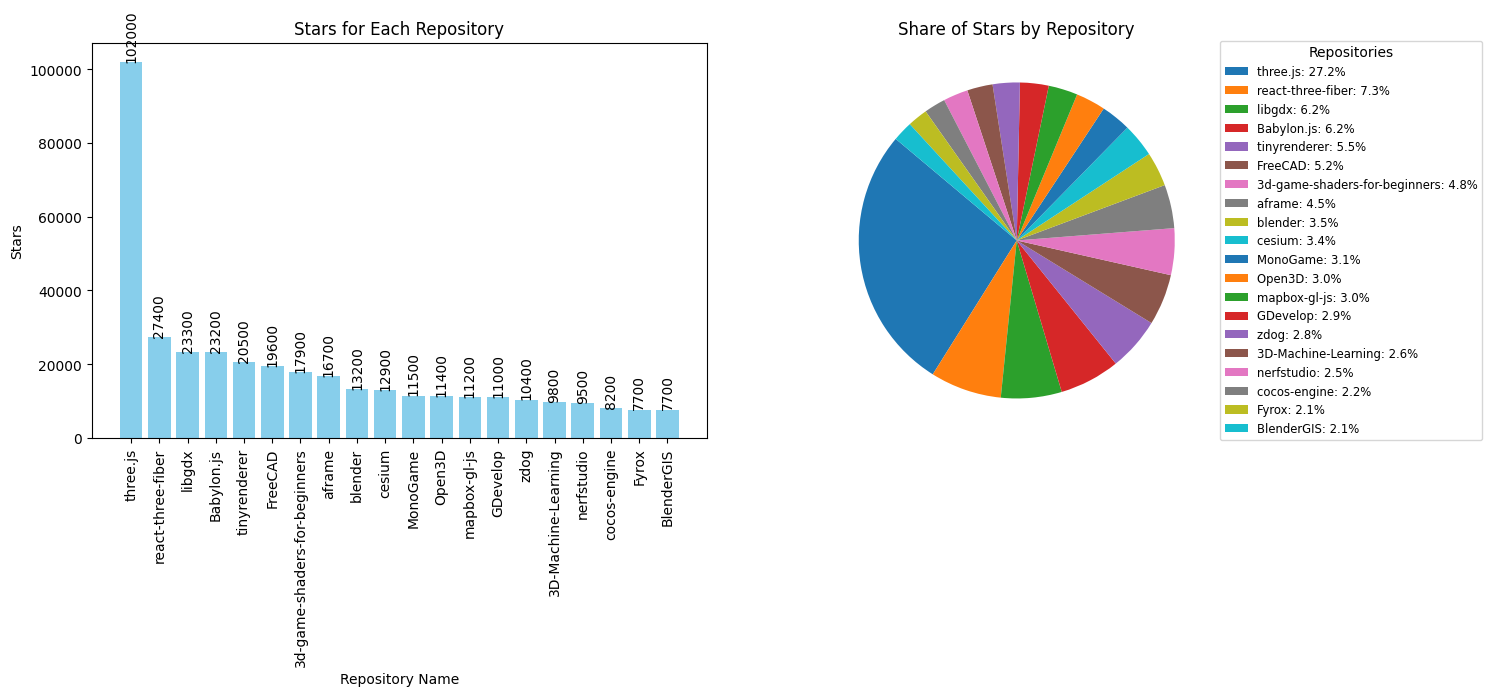

In [83]:
plt.figure(figsize=(16, 7))

# Bar Chart with counts on top, increased bar width, and vertical text
plt.subplot(1, 2, 1)
bars = plt.bar(topic_repo_df['repo_name'], topic_repo_df['stars'], color='skyblue', width=0.8)
plt.xticks(rotation=90)
plt.xlabel('Repository Name')
plt.ylabel('Stars')
plt.title('Stars for Each Repository')

# Adding vertical star count labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom', rotation=90)

# Pie Chart without percentages in the chart, using legend instead
plt.subplot(1, 2, 2)
plt.pie(topic_repo_df['stars'], labels=None, startangle=140)
plt.title('Share of Stars by Repository')

# Calculate percentage for each repository
total_stars = topic_repo_df['stars'].sum()
legend_labels = [
    f"{name}: {stars / total_stars * 100:.1f}%" 
    for name, stars in zip(topic_repo_df['repo_name'], topic_repo_df['stars'])
]

# Adding a legend with repository names and their respective percentages
plt.legend(legend_labels, title="Repositories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), fontsize='small')

# Display the plots with tight layout
plt.tight_layout()
plt.show()